In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("time.csv")
df.head()

,BufferSize,Consumer,Producer,Time(ms)
0,1,1,1,582.821563
1,1,1,1,580.046579
2,1,1,1,661.925552
3,1,1,1,565.720188
4,1,1,1,606.883609


In [3]:
df = df.round({"Time(ms)": 2})
df.head()

,BufferSize,Consumer,Producer,Time(ms)
0,1,1,1,582.82
1,1,1,1,580.05
2,1,1,1,661.93
3,1,1,1,565.72
4,1,1,1,606.88


In [4]:
df = df.groupby(by=["BufferSize","Consumer","Producer"])["Time(ms)"].mean().reset_index()
df = df.rename(columns={"Time(ms)" : "Mean Time(ms)"})

In [5]:
df["Consumer-Producer"] = df["Consumer"].astype(str) + "-" + df["Producer"].astype(str)
df.head()

,BufferSize,Consumer,Producer,Mean Time(ms),Consumer-Producer
0,1,1,1,593.663,1-1
1,1,1,2,2792.374,1-2
2,1,1,4,2793.182,1-4
3,1,1,8,2821.429,1-8
4,1,2,1,912.376,2-1


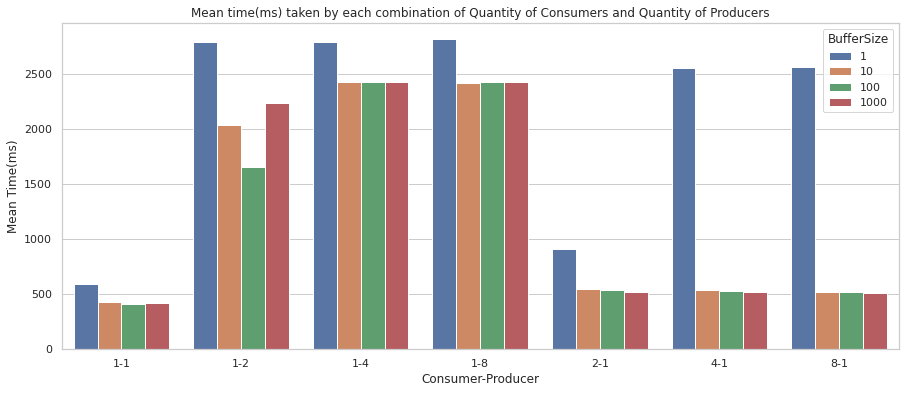

In [6]:
sns.set(style="whitegrid", context="notebook")
plt.figure(figsize=(15,6))
sns.barplot(data=df,x="Consumer-Producer",y="Mean Time(ms)",hue="BufferSize",palette="deep")
plt.title("Mean time(ms) taken by each combination of Quantity of Consumers and Quantity of Producers")
plt.savefig("timeProdCons.png",dpi=600)

## buffer analysis

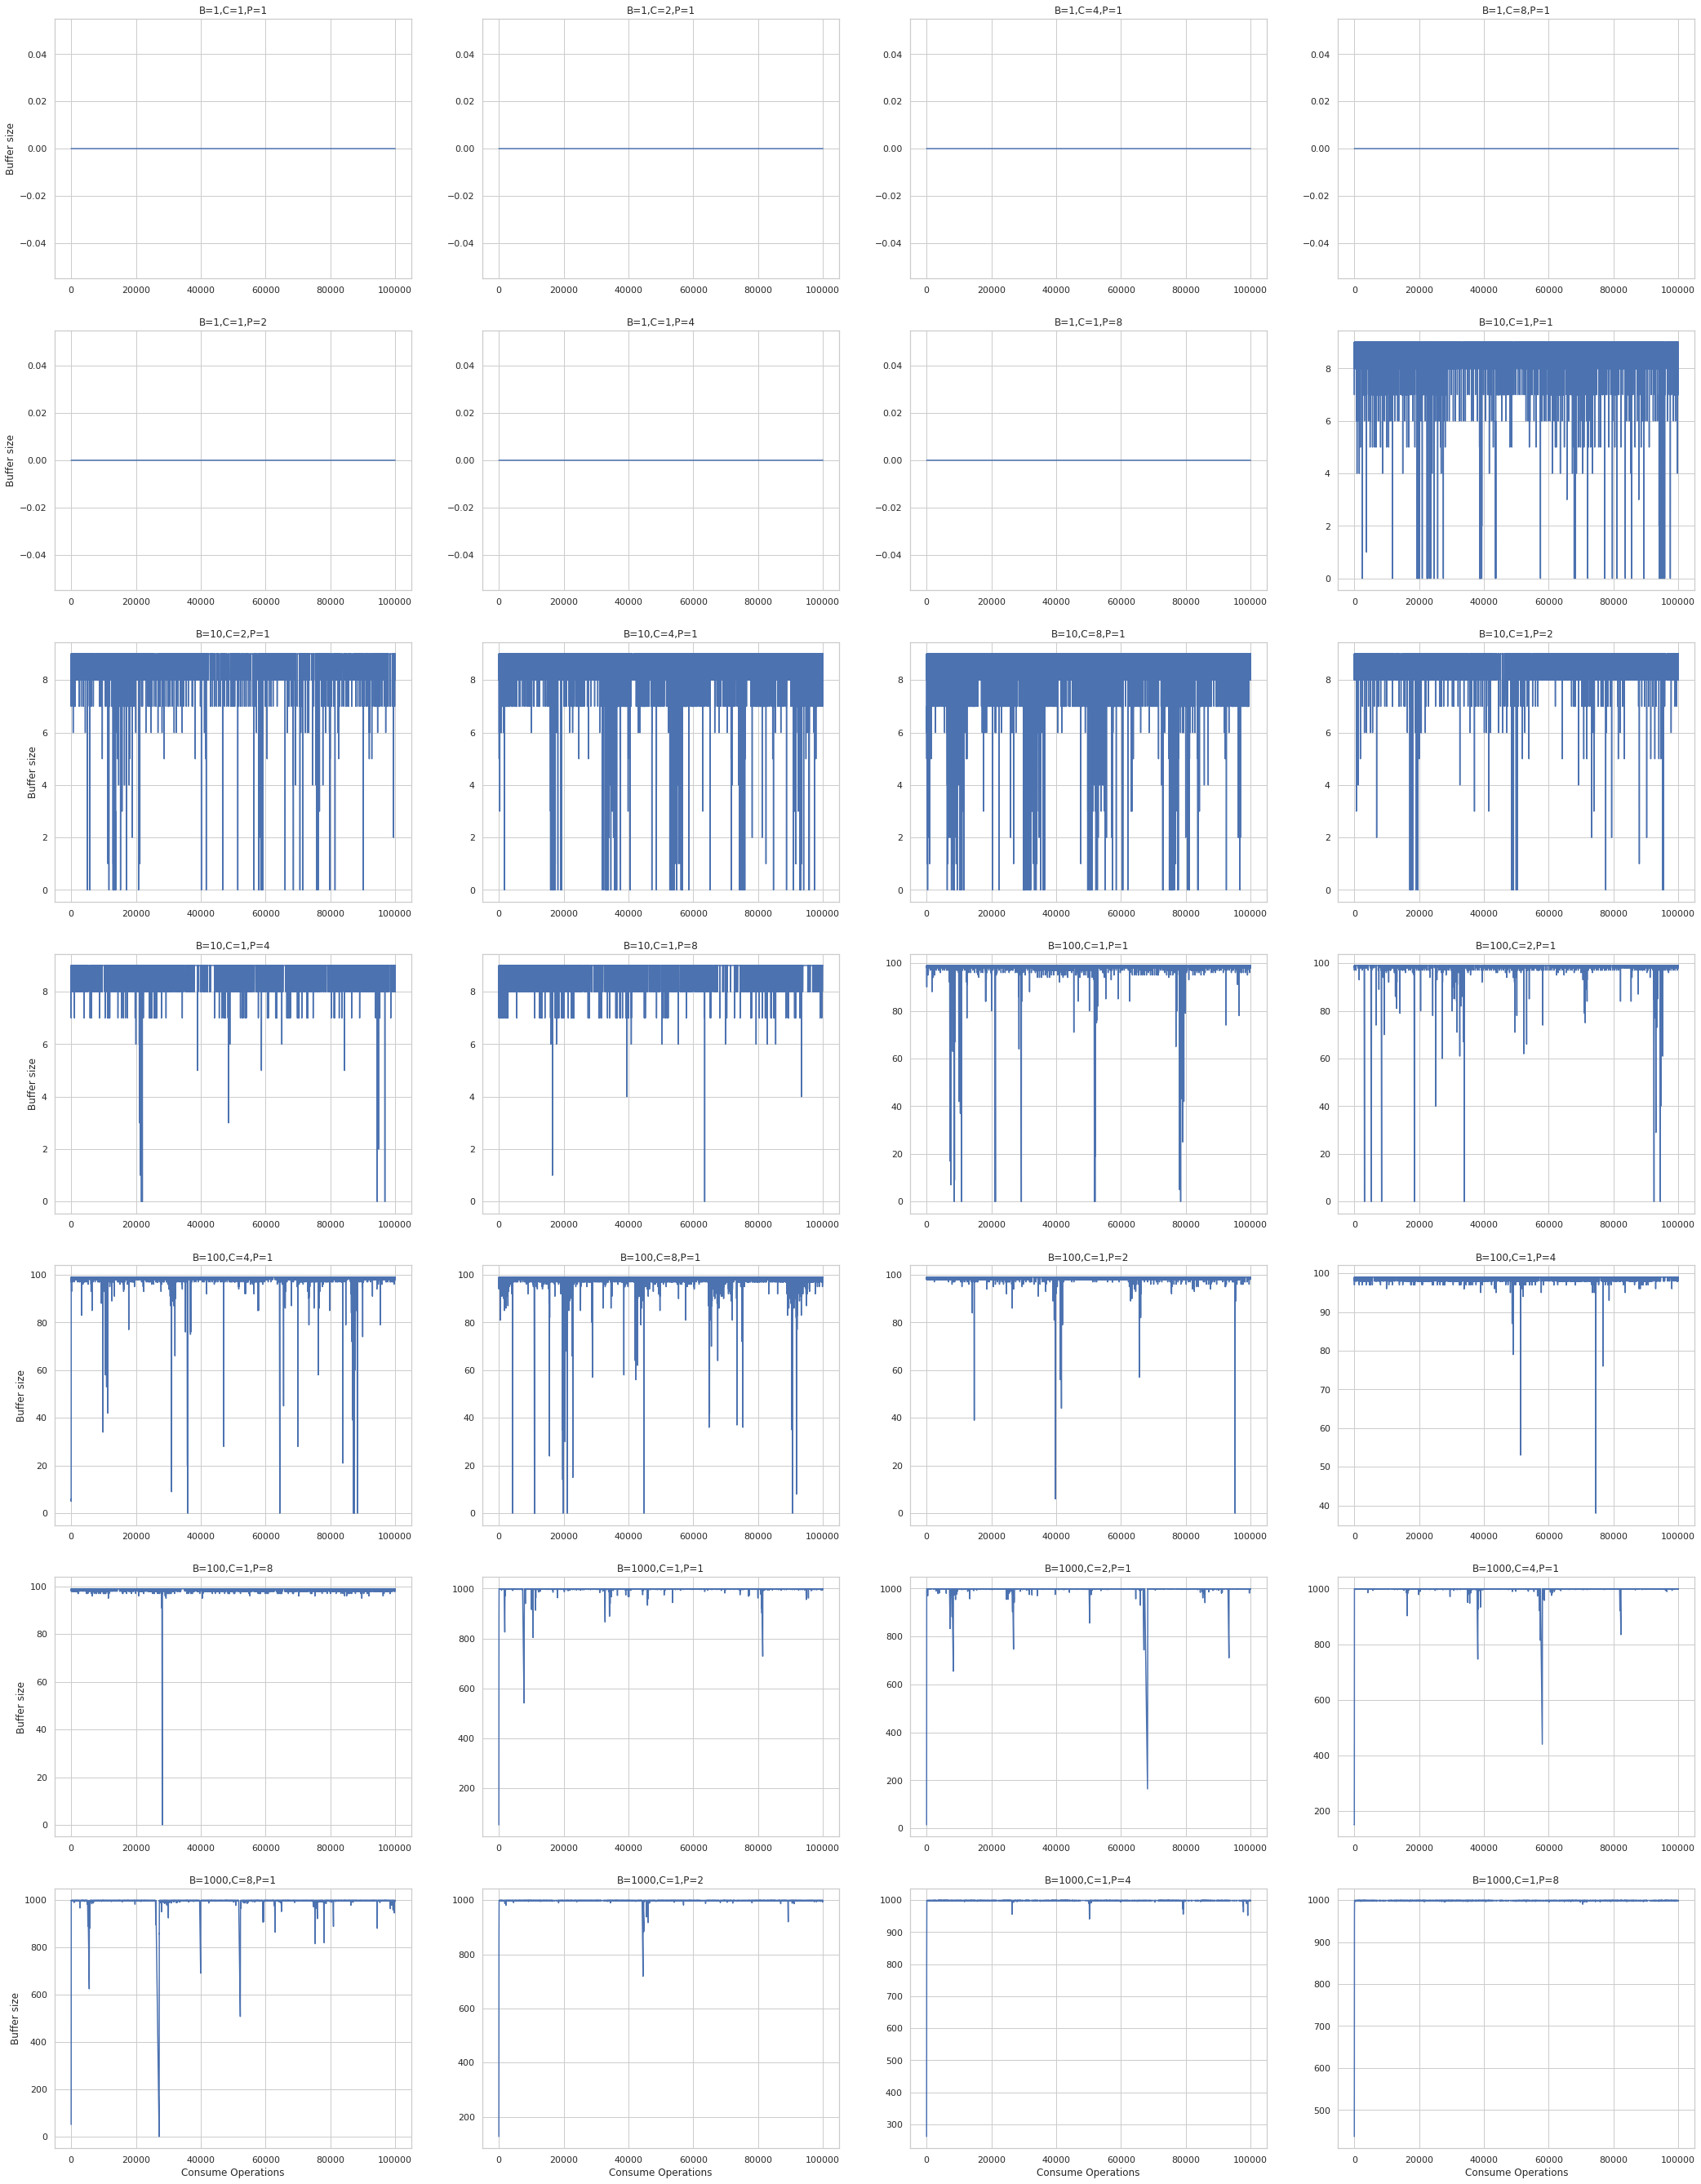

In [10]:
with open("bufferInfo.txt","r") as f:
    lines = f.readlines()

    
unique_configurations = {}

nrows = 7  # Number of rows in the subplot grid
ncols = 4  # Number of columns in the subplot grid
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(36, 48))  # Create the subplot grid

for i in range(0, len(lines),2):
    config_line = lines[i].strip()
    vector_line = lines[i+1].strip()
    
    params = config_line.split(',')
    b_value = None
    c_value = None
    p_value = None
    for param in params:
        if param.startswith("B="):
            b_value = param.split("=")[1]
        elif param.startswith("C="):
            c_value = param.split("=")[1]
        elif param.startswith("P="):
            p_value = param.split("=")[1]
            
    if (b_value,c_value,p_value) not in unique_configurations:
        unique_configurations[(b_value,c_value,p_value)] = True
#         samples.append((config_line,vector_line))

        vector_values = [int(num) for num in vector_line.split()]
    
        x_values = list(range(1,len(vector_values) + 1))
        
        subplot_index = len(unique_configurations)
        
        subplot_row = (subplot_index - 1) // ncols
        subplot_col = (subplot_index - 1) % ncols
        ax = axes[subplot_row, subplot_col]

        # Plot the line plot in the selected subplot
        ax.plot(x_values, vector_values)
        ax.set_title(config_line)

        # Set labels for the subplot
        if subplot_row == nrows - 1:
            ax.set_xlabel('Consume Operations')
        if subplot_col == 0:
            ax.set_ylabel('Buffer size')
plt.savefig("bufferProdCons.png",dpi=600)